In [3]:
import pymongo


client = pymongo.MongoClient()

# print(client.list_database_names())
db = client['PAM2060']
# print(db.list_collection_names())
col = db['vision_retries']


In [2]:
for s in range(101,111):
    res = col.find({'station':s, 'component': 'holder'})
    res = [r['steps'] for r in res]
    res2 = [len(r) for r in res]
    av = sum(res2) / len(res2)

    print(s, av, res)

101 2.630653266331658 [[-7.2, -0.0], [21.6, 3.6, -0.0], [-100.8, -3.6, -0.0], [-36.0, -0.0], [46.800000000000004, 7.2, -0.0], [-93.60000000000001, -3.6, -0.0], [-72.0, -0.0], [115.2, 25.2, 21.6, 14.4, 7.2, -0.0], [115.2, 14.4, -0.0], [126.0, -0.0], [-7.2, -0.0], [18.0, -0.0], [-136.8, -7.2, -0.0], [-0.0], [172.8, 3.6, -0.0], [93.60000000000001, 36.0, 14.4, -0.0], [64.8, -0.0], [108.0, 3.6, -0.0], [-79.2, -3.6, -0.0], [-172.8, -7.2, -0.0], [-100.8, -3.6, -0.0], [-82.8, -3.6, -0.0], [100.8, -0.0], [-43.2, -0.0], [-151.20000000000002, -32.4, -7.2, -0.0], [18.0, 10.8, -0.0], [-36.0, -0.0], [154.8, 7.2, 3.6, -0.0], [172.8, 3.6, -0.0], [-93.60000000000001, -0.0], [118.8, 14.4, -0.0], [-154.8, -7.2, -0.0], [-176.4, -3.6, -0.0], [-75.60000000000001, -0.0], [-86.4, -0.0], [-151.20000000000002, -3.6, -0.0], [-172.8, -0.0], [93.60000000000001, 18.0, 7.2, -0.0], [169.20000000000002, 7.2, -0.0], [79.2, 3.6, -0.0], [154.8, -0.0], [-72.0, -7.2, -0.0], [21.6, -0.0], [158.4, 10.8, -0.0], [57.6, 3.6, -0

/tmp/ipykernel_19393/3568528979.py:9: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  print(col.find({'component': 'dosing', "_id": {"$gte": dummy_id}}).count())


339
101 holder 0.0
101 dosing 0.0
102 holder 0.0
102 dosing 0.0
103 holder 0.0
103 dosing 0.0
104 holder 0.0
104 dosing 0.0
105 holder 0.0
105 dosing 0.0
106 holder 0.0
106 dosing 0.0
107 holder 0.0
107 dosing 0.0
108 holder 2.941176470588235
108 dosing 0.0
109 holder 0.0
109 dosing 0.0
110 holder 0.0
110 dosing 0.0


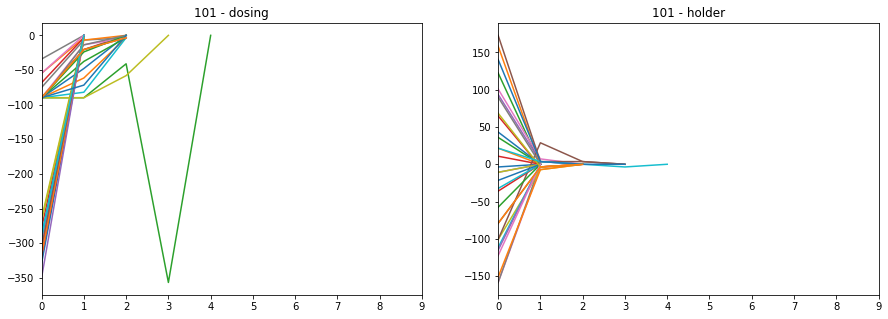

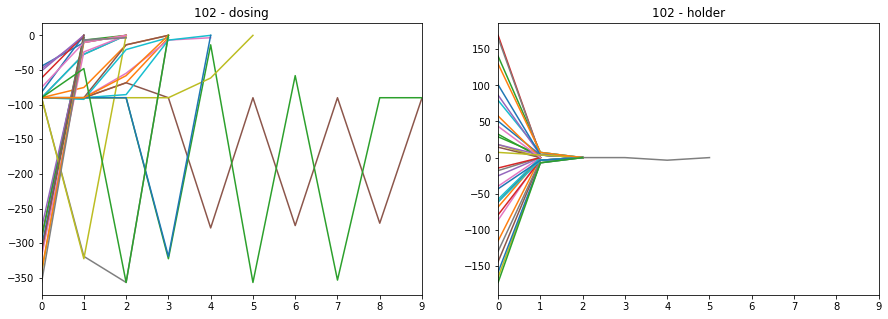

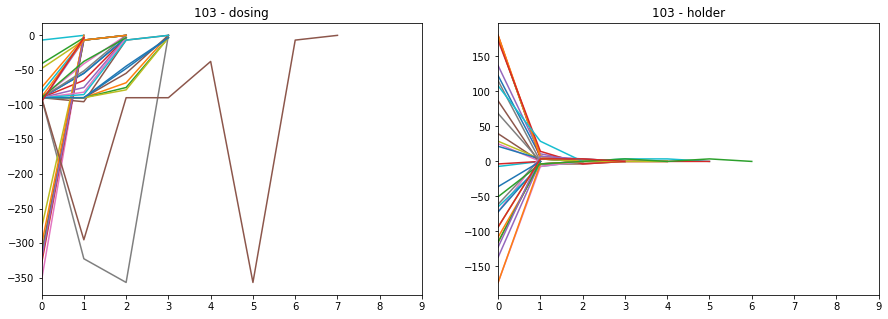

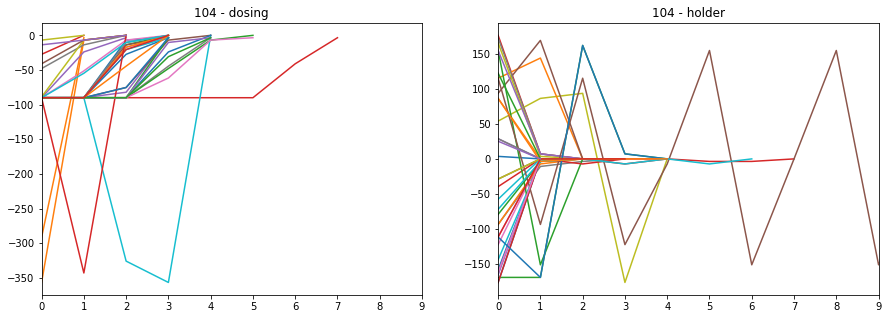

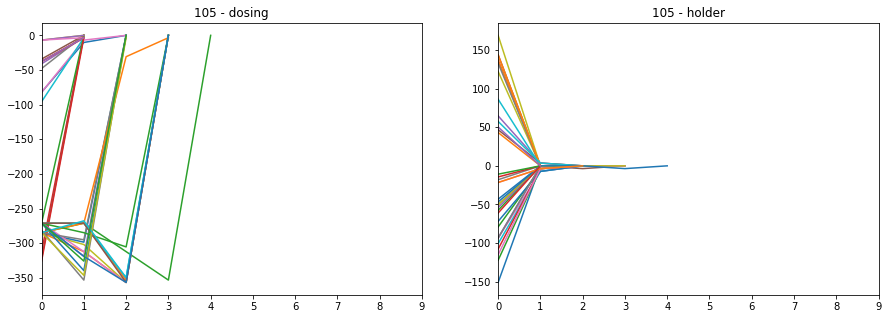

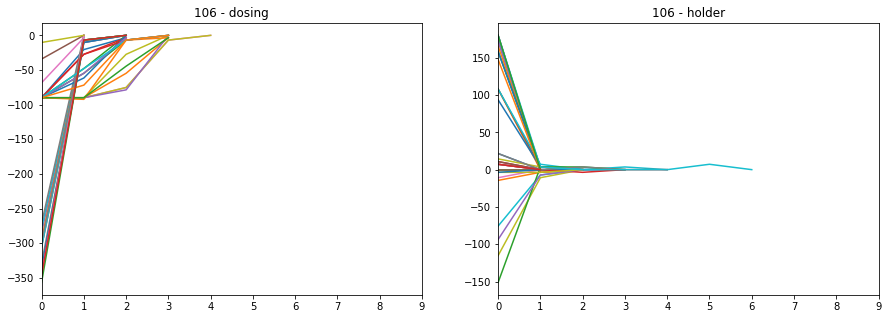

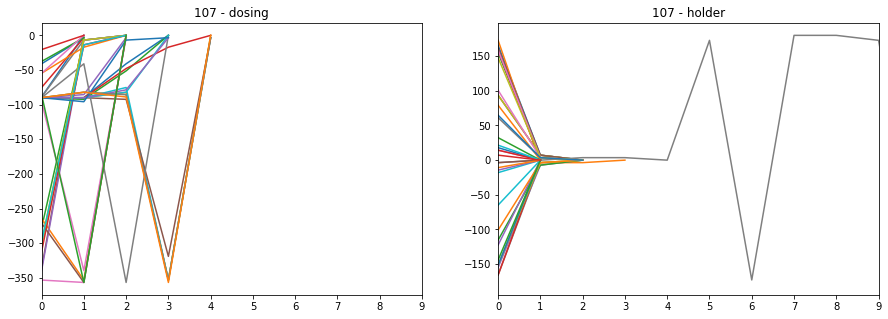

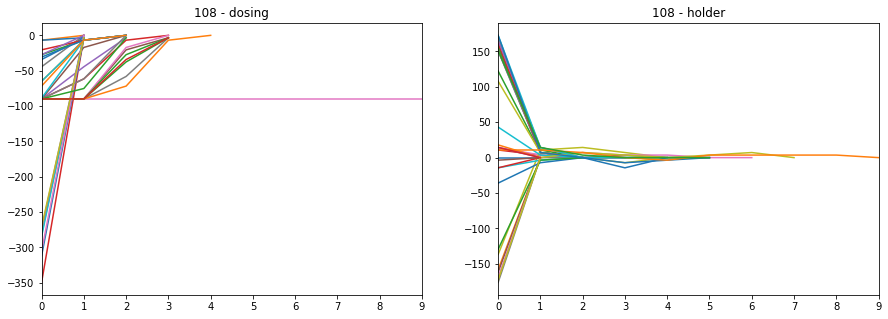

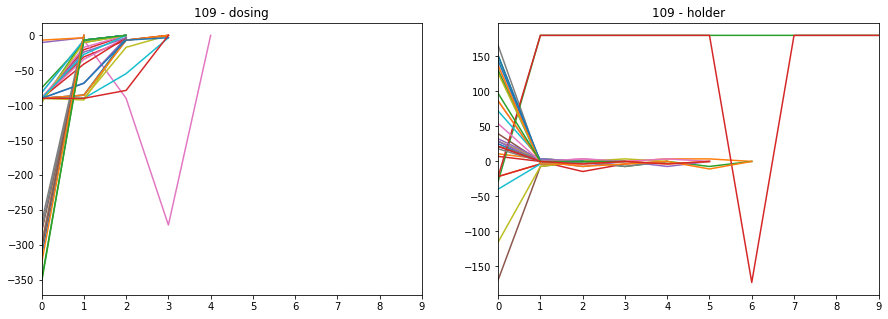

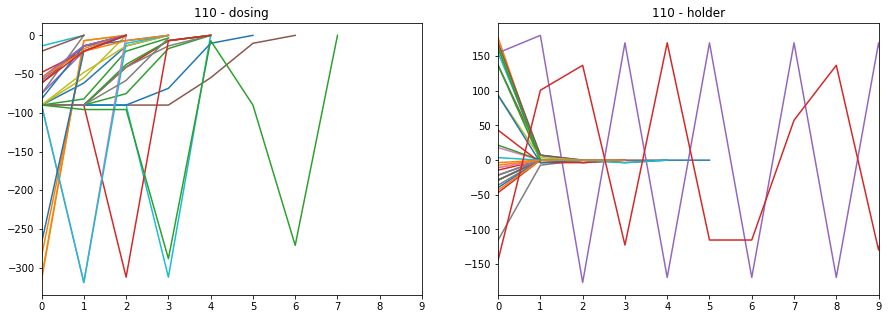

In [10]:
import matplotlib.pyplot as plt
import datetime
from bson.objectid import ObjectId

now = datetime.datetime.now() - datetime.timedelta(hours=3.5)
from_time = now - datetime.timedelta(hours=0, minutes=30)
dummy_id = ObjectId.from_datetime(from_time)

print(col.find({'component': 'dosing', "_id": {"$gte": dummy_id}}).count())
for s in range(101,111):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    axs = {'dosing': ax1, 'holder': ax2}
    fig.set_size_inches(15, 5, forward=True)

    for component in ['holder', 'dosing']:
        res = col.find({'station':s, 'component': component, "_id": {"$gte": dummy_id}})
        res = [r['steps'] for r in res]
        print(s, component, sum([len(r) == 10 for r in res])/len(res)*100)
        ax = axs[component]
        for i in res:
            ax.plot(i)
        ax.set_xlim(0,9) 

        ax.set_title(str(s) + ' - ' + component)
